# knnアルゴリズムに基づく機械学習予測モデル
### 目的：人の持っている属性から、この人が民主党か共和党かを予測する

In [38]:
#必要なモジュールを導入する
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#csvファイルから生データの読み取り、pythonのデータフレームワークに保存する
df = pd.read_csv("congressional_voting_dataset.csv")

In [16]:
#トレーニングするためのデータ前処理：文字列から数字への変換＆null値の処理
df = df.replace('y', 1).replace('n', 0).replace('?', np.nan).dropna().replace('democrat',0).replace('republican',1)

In [17]:
#処理後データの様子を覗く
df.head(5)

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
25,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0


In [18]:
#「属性」と「ラベル」になる項目を分ける
y = df['political_party'].values
X = df.drop('political_party', axis = 1).values

In [19]:
#トレーニングデータとテストデータセットを分ける（6:4）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 121, stratify = y)

In [20]:
#K近隣分類器を呼び出し、k値（パラメータ：最も近い参照になるデータポイント数）を設定
knn = KNeighborsClassifier(n_neighbors = 8)

In [21]:
#トレーニングデータを分類器に投げで、モデルを訓練する
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [22]:
#テストデータを訓練されたモデルに投げで、予測結果を取得
y_pred = knn.predict(X_test)

In [23]:
#混同行列結果をプリントする: {[真陽性,偽陰性],[偽陽性,真陰性]}
print(confusion_matrix(y_test,y_pred))

[[44  6]
 [ 1 42]]


In [24]:
#分類レポートをプリントする（訓練されたモデルのパフォーマンス評価レポート）
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.98      0.88      0.93        50
          1       0.88      0.98      0.92        43

avg / total       0.93      0.92      0.92        93



In [36]:
#ROC曲線の第二引数の設定
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [26]:
#ROC曲線の三要素の生成
fpr,tpr,threshold = roc_curve(y_test, y_pred_prob)

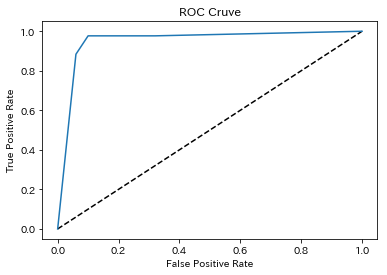

In [28]:
#ROC曲線の作成
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Cruve')
plt.show()

In [30]:
#AUCの計算(area under curve)
roc_auc_score(y_test, y_pred_prob)

0.9506976744186046

In [35]:
#交差検定による五つの評価点数の計算
cv_scores = cross_val_score(knn, X, y,cv = 5, scoring = 'roc_auc')
print(cv_scores)

[0.94909091 0.94636364 0.97454545 1.         0.91765873]


In [115]:
#ハイパーパラメーターの調整
param_grid = {'n_neighbors': list(range(1,50))} #先ずはハイパーパラメーターの範囲指定
knn2 = KNeighborsClassifier()#分類器を改めて呼び出す（新しモデル作るため）
knn2_cv = GridSearchCV(knn2, param_grid, cv = 5, scoring='accuracy')#グリードサーチ交差検定のパラメータを定義する

In [116]:
knn2_cv.fit(X_train,y_train) #ハイパーパラメーター（k値）を1から50までの50個モデル生成

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
print("Best k-value:{}".format(knn2_cv.best_params_)) #最優ハイパーパラメーター（k値）を洗い出す

Best k-value:{'n_neighbors': 5}


In [118]:
print("Best Score:{}".format(knn2_cv.best_score_)) #最優ハイパーパラメーター（k値）に基づく予測モデルのパフォーマンス評価点数

Best Score:0.9280575539568345
